In [3]:
# 1. Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
# 2. Load Dataset
df = pd.read_csv("/content/1000 Sales Records.csv")

In [6]:
# 3. Data Preprocessing and Cleaning
print("Initial Shape:", df.shape)
df.dropna(inplace=True)
print("Shape after dropping NA:", df.shape)

# Converting Date Column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Encoding categorical data manually (Label Encoding style)
categorical_cols = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']
for col in categorical_cols:
    df[col] = pd.Categorical(df[col]).codes

Initial Shape: (1000, 14)
Shape after dropping NA: (1000, 14)



Summary Statistics:
            Region      Country    Item Type  Sales Channel  Order Priority  \
count  1000.000000  1000.000000  1000.000000     1000.00000     1000.000000   
mean      3.297000    91.695000     5.533000        0.48000        1.490000   
min       0.000000     0.000000     0.000000        0.00000        0.000000   
25%       2.000000    44.750000     2.000000        0.00000        0.000000   
50%       3.000000    92.500000     6.000000        0.00000        2.000000   
75%       6.000000   137.000000     9.000000        1.00000        2.000000   
max       6.000000   184.000000    11.000000        1.00000        3.000000   
std       2.031482    53.823405     3.569545        0.49985        1.122123   

                          Order Date      Order ID   Units Sold  Unit Price  \
count                           1000  1.000000e+03  1000.000000  1000.00000   
mean   2013-09-19 23:29:45.600000256  5.496813e+08  5053.988000   262.10684   
min              2010-01-01 00

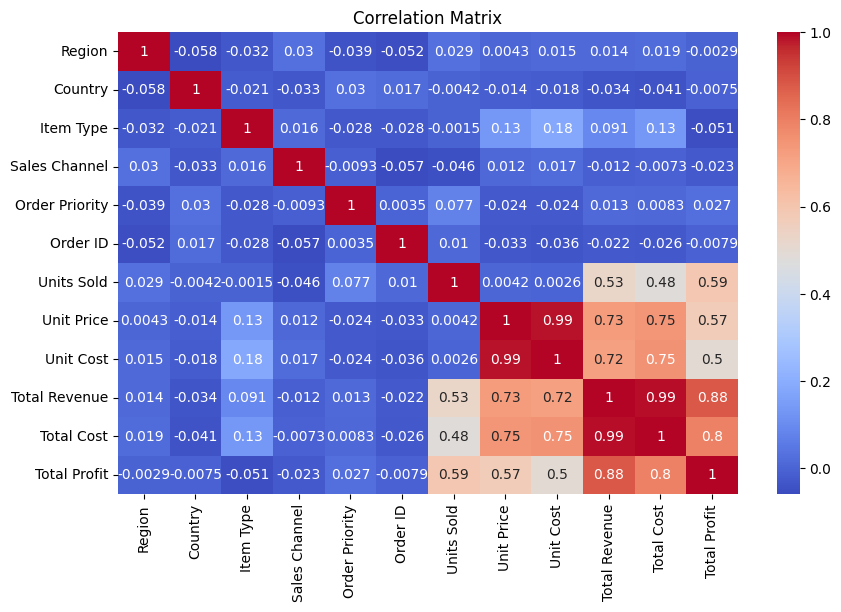


Covariance Matrix:
                      Region       Country     Item Type  Sales Channel  \
Region          4.126918e+00 -6.395811e+00 -2.315325e-01   3.047047e-02   
Country        -6.395811e+00  2.896959e+03 -4.052487e+00  -8.774775e-01   
Item Type      -2.315325e-01 -4.052487e+00  1.274165e+01   2.818819e-02   
Sales Channel   3.047047e-02 -8.774775e-01  2.818819e-02   2.498498e-01   
Order Priority -8.861862e-02  1.797247e+00 -1.132833e-01  -5.205205e-03   
Order ID       -2.719427e+07  2.354083e+08 -2.600678e+07  -7.263300e+06   
Units Sold      1.731317e+02 -6.491178e+02 -1.525186e+01  -6.688112e+01   
Unit Price      1.908827e+00 -1.653963e+02  1.034027e+02   1.245723e+00   
Unit Cost       5.402535e+00 -1.659850e+02  1.145858e+02   1.460998e+00   
Total Revenue   4.262934e+04 -2.723246e+06  4.847953e+05  -8.725087e+03   
Total Cost      4.488450e+04 -2.569153e+06  5.552916e+05  -4.258702e+03   
Total Profit   -2.255159e+03 -1.540937e+05 -7.049628e+04  -4.466385e+03   

    

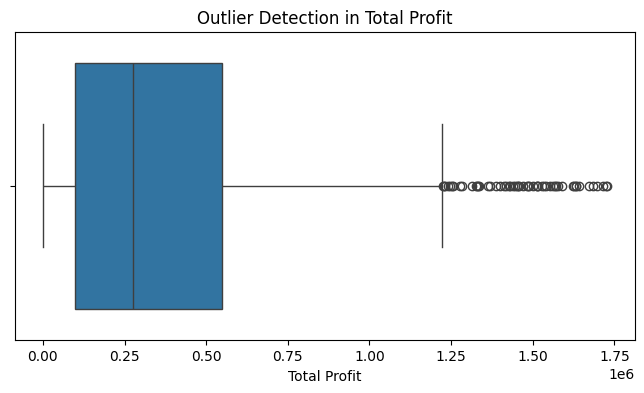

In [12]:
# 4. Exploratory Data Analysis (EDA)
print("\nSummary Statistics:")
print(df.describe())

# Correlation Matrix (only for numeric columns)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Covariance Matrix
print("\nCovariance Matrix:")
print(numeric_df.cov())

# Outlier Detection
plt.figure(figsize=(8, 4))
sns.boxplot(data=numeric_df, x='Total Profit')
plt.title("Outlier Detection in Total Profit")
plt.show()

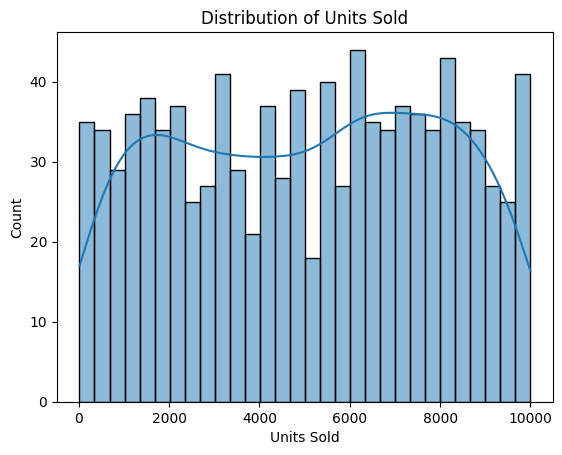

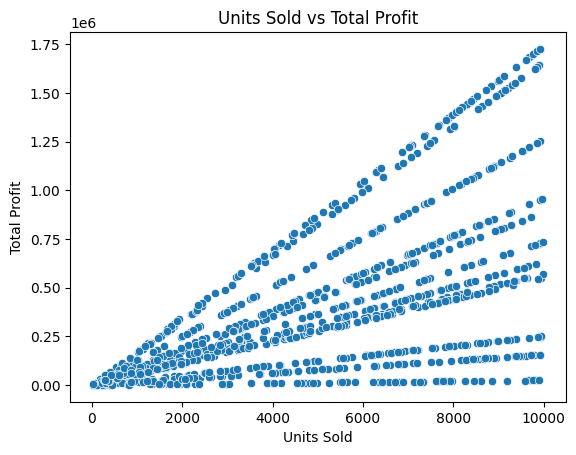

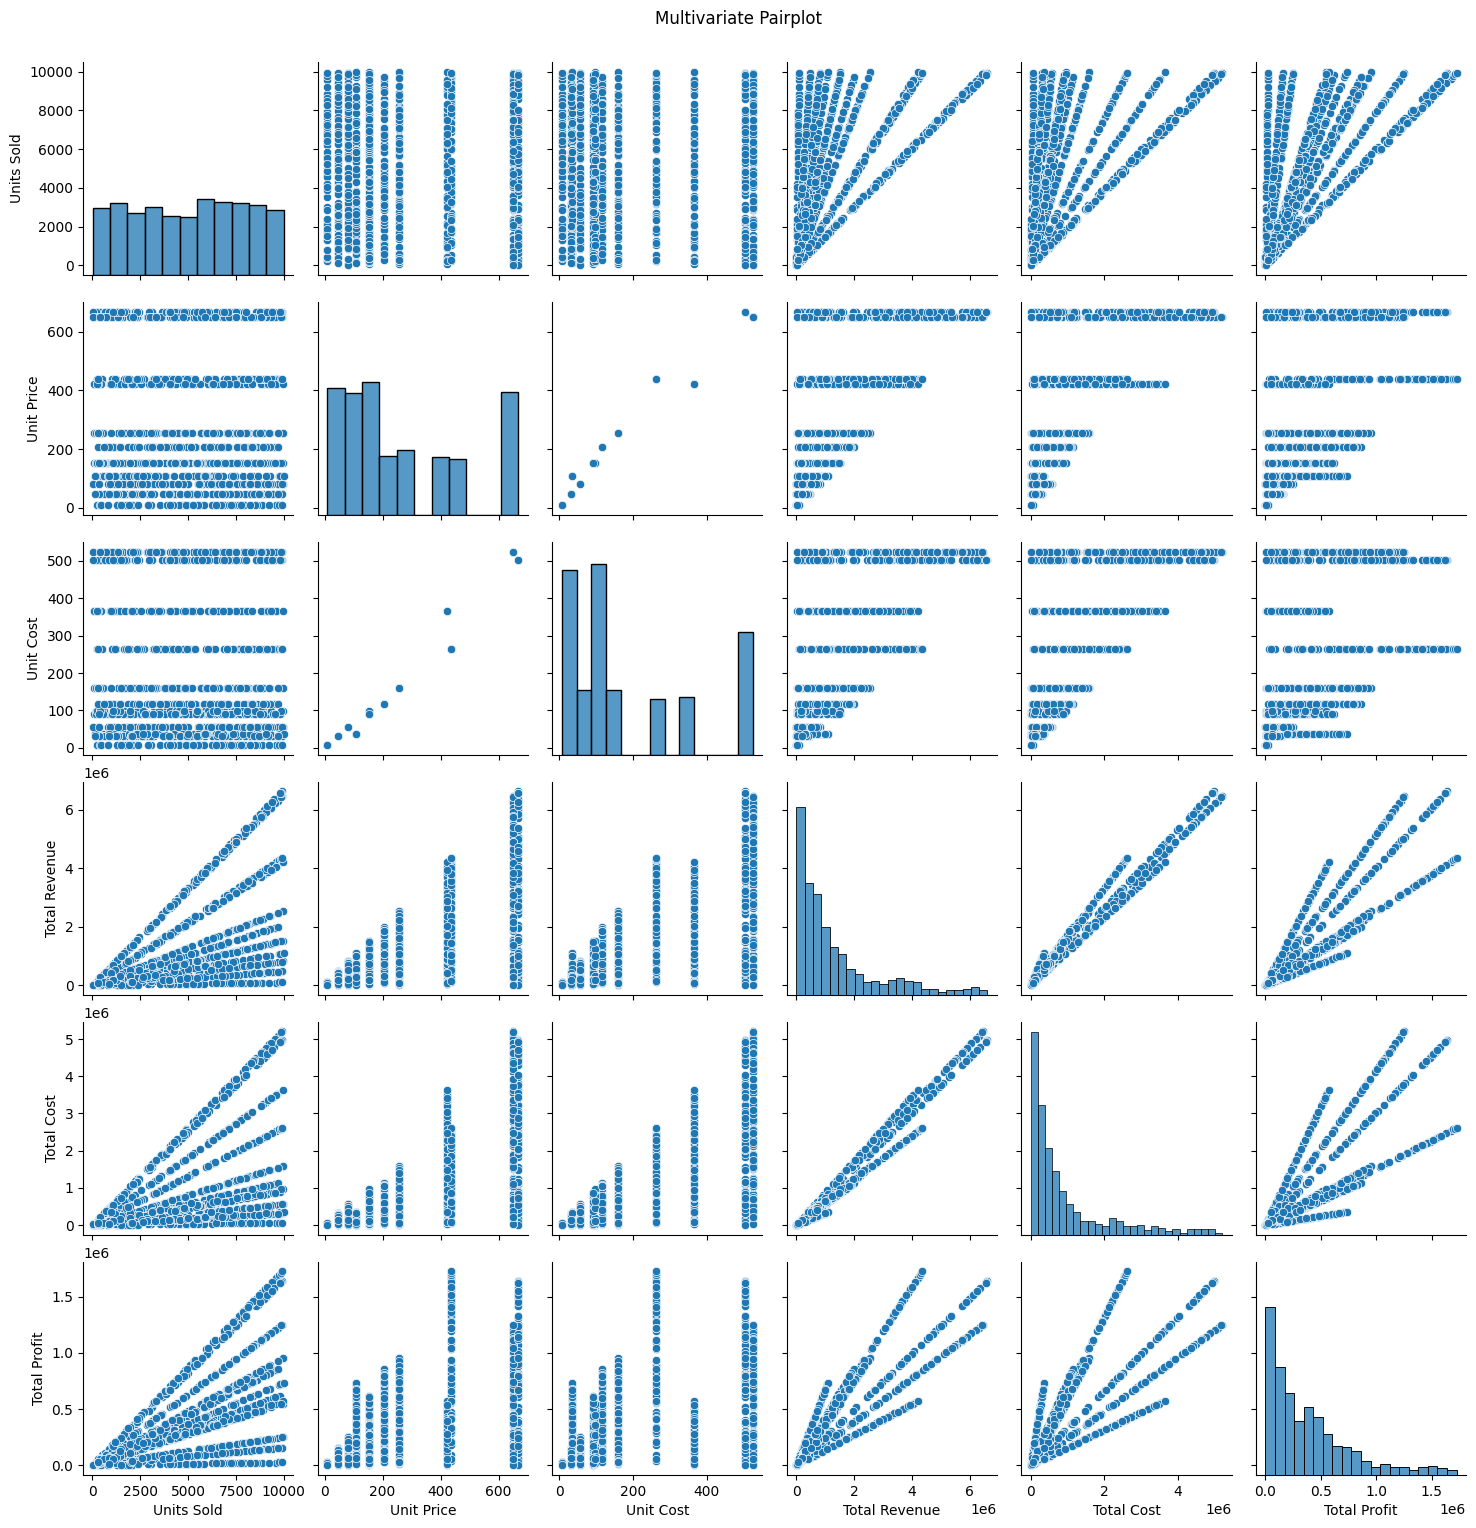

In [8]:
# 5. Visualizations (EDA using Visualization)
# Univariate
sns.histplot(df['Units Sold'], bins=30, kde=True)
plt.title("Distribution of Units Sold")
plt.show()

# Bivariate
sns.scatterplot(x='Units Sold', y='Total Profit', data=df)
plt.title("Units Sold vs Total Profit")
plt.show()

# Multivariate
sns.pairplot(df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']])
plt.suptitle("Multivariate Pairplot", y=1.02)
plt.show()


Linear Regression Equation: y = 78.27x + -4386.74


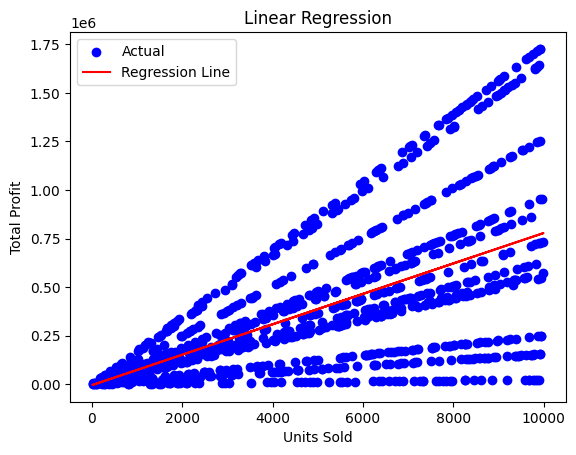

MSE: 95510449852.55
RMSE: 309047.65
R^2 Score: 0.35


In [9]:
# 6. Linear Regression from Scratch
X = df['Units Sold'].values
y = df['Total Profit'].values

# Mean
mean_x = np.mean(X)
mean_y = np.mean(y)

# Calculating slope (m) and intercept (b)
n = len(X)
m = sum((X - mean_x) * (y - mean_y)) / sum((X - mean_x)**2)
b = mean_y - m * mean_x

print(f"\nLinear Regression Equation: y = {m:.2f}x + {b:.2f}")

# Predictions
y_pred = m * X + b

# Plotting Regression Line
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel("Units Sold")
plt.ylabel("Total Profit")
plt.title("Linear Regression")
plt.legend()
plt.show()

# Error Metrics
mse = np.mean((y - y_pred)**2)
rmse = np.sqrt(mse)
ss_total = np.sum((y - mean_y)**2)
ss_res = np.sum((y - y_pred)**2)
r2 = 1 - (ss_res / ss_total)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

In [10]:

# 7. Hypothesis Testing (Example: One Sample t-Test on Total Profit)
t_stat, p_val = stats.ttest_1samp(df['Total Profit'], popmean=500000)
print(f"\nT-test on Total Profit vs Population Mean = 500000")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")


T-test on Total Profit vs Population Mean = 500000
T-statistic: -8.97, P-value: 0.0000


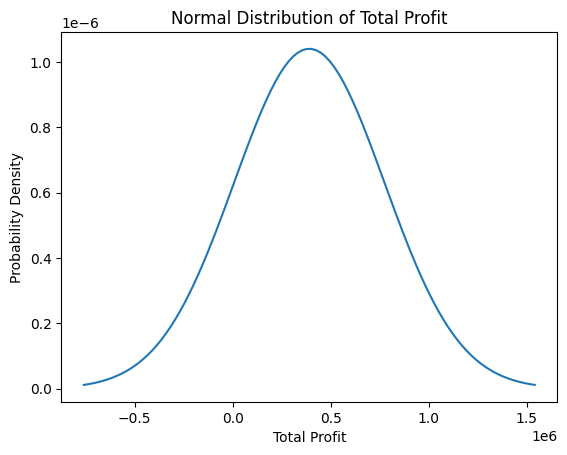

In [11]:

# 8. Probability Distribution Example
# Plotting Normal Distribution
mu, sigma = np.mean(df['Total Profit']), np.std(df['Total Profit'])
values = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(values, stats.norm.pdf(values, mu, sigma))
plt.title("Normal Distribution of Total Profit")
plt.xlabel("Total Profit")
plt.ylabel("Probability Density")
plt.show()

In [ ]:

# 9. CRISP-DM Framework Concept Explanation (to be written in report, not code)
# Business Understanding → Data Understanding → Data Preparation → Modeling → Evaluation → Deployment

# 10. Classification - Just an Introduction in Report (no implementation here)